## Final Project Submission

Please fill out:
* Student name: Miguel Barriola Arranz
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL: https://medium.com/@mbarriolaarranz


# 1. Overview

The project entails performing exploratory data analysis (EDA) on current box office trends to guide the newly established movie studio of your company in creating profitable films. We will collect and analyze data on film genres, budgets, revenues, and ratings to uncover what types of films resonate with audiences and yield high returns. The analysis will result in actionable insights regarding film characteristics such as genre, production budget, and release timing, providing a strategic blueprint for the studio's success in the competitive landscape of film production. The final deliverable will be a concise report with recommendations for the types of films to produce, supported by data-driven evidence.

# 2. Business Understanding

Our business goal is to establish a data-driven foundation for our new film studio's production strategy by answering three critical questions: 

1. Which movie genre yields the highest ROI? 
2. What is the relationship between a movie's run-time and its ROI and production costs? 
3. How does a director's involvement correlate with a movie's ROI and production costs? 

By investigating these areas, we aim to identify profitable genres, optimal film lengths, and directors whose past work indicates a likelihood of future success. These insights will inform our decision-making process in greenlighting new film projects, ensuring that our investments are aligned with market trends and have a higher probability of financial success.

# 3. Data Understanding 

## 3.1 Data Description

Drawing from a rich dataset aggregated from:

- Box Office Mojo
- IMDB
- Rotten Tomatoes
- TheMovieDB
- The Numbers

Our analysis targets three pivotal questions to carve out a strategic niche for our new movie studio. By exploring which movie genres yield the highest ROI, the relationship between a film's runtime and its financial metrics, and the impact of directorial involvement on a movie's success, we aim to uncover actionable insights. This investigation is set to guide our studio in selecting film projects that align with proven market successes, optimizing for genres, runtimes, and directorial choices that historical data suggests are most lucrative. The outcome of this focused analysis will inform our decision-making process, ensuring that our investments capitalize on trends that offer the greatest potential for financial return. This streamlined approach positions our studio to effectively compete in the dynamic film industry landscape, leveraging data-driven strategies to achieve commercial and critical success.

## 3.2 Import Necessary Libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [137]:
pd.set_option('display.max_columns', 500)

## 3.3 Define global variables

In [138]:
INPUT_PATH_bom_movie_gross = "C:\\Users\\Usuario\\Desktop\\FlatIron\\DataScience_FlatIron_Curso\\Phase_2\\Cinema_success_insights\\data\\bom.movie_gross.csv"
INPUT_PATH_tmdb_movies = "C:\\Users\\Usuario\\Desktop\\FlatIron\\DataScience_FlatIron_Curso\\Phase_2\\Cinema_success_insights\\data\\tmdb.movies.csv"
INPUT_PATH_tn_movie_budgets = "C:\\Users\\Usuario\\Desktop\\FlatIron\\DataScience_FlatIron_Curso\\Phase_2\\Cinema_success_insights\\data\\tn.movie_budgets.csv"
INPUT_PATH_rt_movie_info = "C:\\Users\\Usuario\\Desktop\\FlatIron\\DataScience_FlatIron_Curso\\Phase_2\\Cinema_success_insights\\data\\rt.movie_info.tsv"
INPUT_PATH_rt_reviews = "C:\\Users\\Usuario\\Desktop\\FlatIron\\DataScience_FlatIron_Curso\\Phase_2\\Cinema_success_insights\\data\\rt.reviews.tsv"
route_db = r"C:\\Users\\Usuario\\Desktop\\FlatIron\\DataScience_FlatIron_Curso\\Phase_2\\Cinema_success_insights\\data\\im.db"


## 3.4 Functions

In [139]:
#This function is going to get the genre name from the genre id
def get_genre_from_id(genre_ids):
    """
    Converts a list of genre IDs into their corresponding genre names.
    
    Parameters:
    genre_ids (list): A list of integers representing genre IDs.
    
    Returns:
    list: A list of strings where each string is the genre name associated with the input genre ID.
    """
    return [genre_id_dictionary[genre_id] for genre_id in genre_ids]

## 3.5 Code

### 3.5.1 Bom Movie Gross csv 

In [140]:
df_bom = pd.read_csv(INPUT_PATH_bom_movie_gross, encoding="latin-1")
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [141]:
(df_bom.isnull().sum()/len(df_bom))*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [142]:
df_bom.duplicated().sum()

0

Bom Movie Gross dataset contains 3387 movies and includes 5 columns of datapoints on each movie. Another noticeable detail is that foreign_gross contains almost 40% of NaNs

### 3.5.2 Tmdb Movies csv

In [143]:
df_tmdb = pd.read_csv(INPUT_PATH_tmdb_movies, encoding="latin-1", index_col=0)
df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [144]:
(df_tmdb.isnull().sum()/len(df_tmdb))*100

genre_ids            0.0
id                   0.0
original_language    0.0
original_title       0.0
popularity           0.0
release_date         0.0
title                0.0
vote_average         0.0
vote_count           0.0
dtype: float64

In [145]:
df_tmdb.duplicated().sum()

1020

In [146]:
duplicates_df_tmdb = df_tmdb[df_tmdb.duplicated(keep=False)].sort_values('id')
duplicates_df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
20626,"[16, 10751, 14]",129,ja,åã¨åå°ã®ç¥é ã,32.043,2002-09-20,Spirited Away,8.5,7424
14173,"[16, 10751, 14]",129,ja,åã¨åå°ã®ç¥é ã,32.043,2002-09-20,Spirited Away,8.5,7424
43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
24000,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562
20639,"[28, 53, 878]",280,en,Terminator 2: Judgment Day,24.604,1991-07-03,Terminator 2: Judgment Day,7.9,6682
...,...,...,...,...,...,...,...,...,...
17071,[27],560717,en,Requiem,0.600,2015-01-01,Requiem,5.0,1
23685,[35],564441,en,Adopting Trouble,0.600,2016-04-08,Adopting Trouble,4.0,2
20461,[35],564441,en,Adopting Trouble,0.600,2016-04-08,Adopting Trouble,4.0,2
23785,[99],572012,en,Harvested Alive - 10 Years of Investigations,0.600,2016-11-28,Harvested Alive,1.0,1


In [147]:
df_tmdb.drop_duplicates(inplace=True)
df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Tmdb movies dataset contains 25497 movies and includes 9 columns of datapoints on each movie. There are no NaNs in any of the columns. 
We proceeded to drop all the duplicated registrations. 

### 3.5.3 Tn movie budgets csv

In [148]:
df_tn = pd.read_csv(INPUT_PATH_tn_movie_budgets, encoding="latin-1")
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [149]:
(df_tn.isnull().sum()/len(df_tn))*100

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64

In [150]:
df_tn.duplicated().sum()

0

Tn movie budget dataset contains 5782 movies and includes 6 columns of datapoints on each movie. There are no NaNs in any of the columns and there are no duplicates. 

### 3.5.4  Rt movie information tsv

In [151]:
df_rt_movie = pd.read_csv(INPUT_PATH_rt_movie_info, delimiter = '\t', encoding="latin-1")
df_rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [152]:
(df_rt_movie.isnull().sum()/len(df_rt_movie))*100

id               0.000000
synopsis         3.974359
rating           0.192308
genre            0.512821
director        12.756410
writer          28.782051
theater_date    23.012821
dvd_date        23.012821
currency        78.205128
box_office      78.205128
runtime          1.923077
studio          68.333333
dtype: float64

In [153]:
df_rt_movie.duplicated().sum()

0

Rt movie information dataset contains 1560 movies and includes 12 columns of datapoints on each movie. There is a high percentage of NaNs in currency, box_office and studio. There are no duplicates. 

### 3.5.5  Rt reviews tsv

In [154]:
df_rt_reviews = pd.read_csv(INPUT_PATH_rt_reviews, delimiter = '\t', encoding="latin-1")
df_rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [155]:
(df_rt_reviews.isnull().sum()/len(df_rt_reviews))*100

id             0.000000
review        10.220091
rating        24.832819
fresh          0.000000
critic         5.000735
top_critic     0.000000
publisher      0.567681
date           0.000000
dtype: float64

In [156]:
df_rt_reviews.duplicated().sum()

9

In [157]:
duplicates_df_5_rt_reviews = df_rt_reviews[df_rt_reviews.duplicated(keep=False)]
duplicates_df_5_rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
8128,304,"Friends With Kids is a smart, witty and potty-...",NaN,fresh,NaN,0,Liverpool Echo,"June 29, 2012"
8129,304,"Friends With Kids is a smart, witty and potty-...",NaN,fresh,NaN,0,Liverpool Echo,"June 29, 2012"
14574,581,NaN,4.5/5,fresh,NaN,0,Film Threat,"December 6, 2005"
14575,581,NaN,4.5/5,fresh,NaN,0,Film Threat,"December 6, 2005"
26225,1055,NaN,4/5,fresh,NaN,0,Film Threat,"December 6, 2005"
26226,1055,NaN,4/5,fresh,NaN,0,Film Threat,"December 6, 2005"
35161,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 6, 2005"
35162,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 6, 2005"
35165,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 8, 2002"
35166,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 8, 2002"


Rt reviews dataset contains 54432 movies and includes 8 columns of datapoints on each movie. There is a low percentage of NaNs in review, and rating. 

There are 9 duplicated rows.


### 3.5.6  IM sqlite3

In [158]:
conn = sqlite3.connect(route_db)
df_im_movie_basics = pd.read_sql_query("SELECT * FROM MOVIE_BASICS", conn)

df_im_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [159]:
(df_im_movie_basics.isnull().sum()/len(df_im_movie_basics))*100

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

### 3.5.7 First Question: Which genre has a higher ROI?

To be able to answer this question we would have to combine Tmdb Movies and Tn movie budgets 
We would be unable to extract the information of the ROI for each genre from IM because it does not have information about revenues

**Let's start looking at df_tmdb**

In [160]:
df_tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


We are going to analyze all the films regarless of the original language they are in. Also, we are going to drop the unnecessary columns from the tmdb dataset

In [161]:
df_tmdb_updated = df_tmdb.drop(['original_title','original_language','vote_average','vote_count','release_date','popularity'],axis=1)
df_tmdb_updated

,genre_ids,id,title
0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1
1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon
2,"[12, 28, 878]",10138,Iron Man 2
3,"[16, 35, 10751]",862,Toy Story
4,"[28, 878, 12]",27205,Inception
...,...,...,...
26512,"[27, 18]",488143,Laboratory Conditions
26513,"[18, 53]",485975,_EXHIBIT_84xxx_
26514,"[14, 28, 12]",381231,The Last One
26515,"[10751, 12, 28]",366854,Trailer Made


If we look at the column 'genre_ids' one can see that there is a list of them for each movie. One would think that it's because a movie can have multiple genres. 

To make sense of the genre_ids, we found a logical value for each genre_id in the TMDB website: https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee


In [162]:
TMDB_dictionary = {
'Action' : 28,
'Adventure' : 12,
'Animation' : 16,
'Comedy' : 35,
'Crime' : 80,
'Documentary' : 99,
'Drama' : 18,
'Family' : 10751,
'Fantasy' : 14,
'History' : 36,
'Horror' : 27,
'Music' : 10402,
'Mystery' : 9648,
'Romance' : 10749,
'Science Fiction' : 878,
'TV Movie' : 10770,
'Thriller' : 53,
'War' : 10752,
'Western' : 37
}

genre_id_dictionary = {value:key for key,value in TMDB_dictionary.items()}

We are going to create another column in the dataset that contains the list of genres that each id corresponds to

In [163]:
#We first need to convert genre_ids column from a string to a list
df_tmdb_updated['genre_ids'] = df_tmdb_updated['genre_ids'].apply(lambda x: eval(x))

In [164]:
df_tmdb_updated['genre_name'] = df_tmdb_updated['genre_ids'].map(lambda x: get_genre_from_id(list(x)))
df_tmdb_updated

,genre_ids,id,title,genre_name
0,"[12, 14, 10751]",12444,Harry Potter and the Deathly Hallows: Part 1,"[Adventure, Fantasy, Family]"
1,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,"[Fantasy, Adventure, Animation, Family]"
2,"[12, 28, 878]",10138,Iron Man 2,"[Adventure, Action, Science Fiction]"
3,"[16, 35, 10751]",862,Toy Story,"[Animation, Comedy, Family]"
4,"[28, 878, 12]",27205,Inception,"[Action, Science Fiction, Adventure]"
...,...,...,...,...
26512,"[27, 18]",488143,Laboratory Conditions,"[Horror, Drama]"
26513,"[18, 53]",485975,_EXHIBIT_84xxx_,"[Drama, Thriller]"
26514,"[14, 28, 12]",381231,The Last One,"[Fantasy, Action, Adventure]"
26515,"[10751, 12, 28]",366854,Trailer Made,"[Family, Adventure, Action]"


Given that we now have the genre names we have no need of the genre_ids, so we will proceed to drop the genre_ids column. Also, we are going to explode all the genres of each title.

In [165]:
df_tmdb_updated = df_tmdb_updated.explode('genre_name')
df_tmdb_updated.drop('genre_ids', axis=1, inplace=True)

**Now let's look at df_tn dataset**

In [166]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Let's try to see which columns from df_tmdb and df_tn are related to each other

In [167]:
df_tmdb_updated[df_tmdb_updated['title'].str.contains('Avatar')]

,id,title,genre_name
6,19995,Avatar,Action
6,19995,Avatar,Adventure
6,19995,Avatar,Fantasy
6,19995,Avatar,Science Fiction
1831,278698,Avatar Spirits,NaN
3387,79582,Aliens vs. Avatars,Science Fiction
3387,79582,Aliens vs. Avatars,Horror
3387,79582,Aliens vs. Avatars,Thriller
23157,460441,Avatar Flight of Passage,Adventure
23157,460441,Avatar Flight of Passage,Family


In [168]:
df_tn[df_tn['movie'].str.contains('Avatar')]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


We can see that the columns id don't match and the only possible option for both datasets to be joined is by joinin 'title' from df_tmdb_updated with 'movie' from df_tn
 
Looking at the im dataset, we have information about the genres but there is no information about financial costs or revenues. What we will do is join by the movies name and then carry on the process to try to find the ROI for each genre. 

Now, we will drop unnecessary columns and calculate the ROI values for each movie in the df_tn

In the context of movie finances, "worldwide gross" typically includes the "domestic gross". With that in mind, I am going to calculate the ROI column 

In [169]:
df_tn.drop(['id','release_date','domestic_gross'], axis=1, inplace=True)

In [170]:
# Convert the currency strings to integers
df_tn['production_budget'] = df_tn['production_budget'].replace('[\$,]', '', regex=True).astype(float)
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [171]:
df_tn[df_tn['production_budget']==0]

,movie,production_budget,worldwide_gross


In [172]:
df_tn['ROI_%'] = round(((df_tn['worldwide_gross']-df_tn['production_budget']) / df_tn['production_budget'])*100,2)
df_tn

,movie,production_budget,worldwide_gross,ROI_%
0,Avatar,425000000.0,2.776345e+09,553.26
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,154.67
2,Dark Phoenix,350000000.0,1.497624e+08,-57.21
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,324.38
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,315.37
...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,-100.00
5778,Following,6000.0,2.404950e+05,3908.25
5779,Return to the Land of Wonders,5000.0,1.338000e+03,-73.24
5780,A Plague So Pleasant,1400.0,0.000000e+00,-100.00


Let's now join df_tmdb_updated and df_tn

In [173]:
# We will first have to rename the column 'movie' to 'title' so that we can successfully do the join
df_tn.rename({'movie':'title'},inplace=True,axis=1)

In [174]:
df_question1 = df_tmdb_updated.merge(df_tn, on='title', how='inner')
df_question1

,id,title,genre_name,production_budget,worldwide_gross,ROI_%
0,10191,How to Train Your Dragon,Fantasy,165000000.0,494870992.0,199.92
1,10191,How to Train Your Dragon,Adventure,165000000.0,494870992.0,199.92
2,10191,How to Train Your Dragon,Animation,165000000.0,494870992.0,199.92
3,10191,How to Train Your Dragon,Family,165000000.0,494870992.0,199.92
4,10138,Iron Man 2,Adventure,170000000.0,621156389.0,265.39
...,...,...,...,...,...,...
5234,509306,The Box,Music,25000000.0,34356760.0,37.43
5235,546674,Enough,Comedy,38000000.0,50970660.0,34.13
5236,546674,Enough,Animation,38000000.0,50970660.0,34.13
5237,513161,Undiscovered,NaN,9000000.0,1069318.0,-88.12


In [175]:
df_question1['title'].nunique()

1924

In [176]:
df_question1.groupby('genre_name').count().sort_values('id', ascending=False)

,id,title,production_budget,worldwide_gross,ROI_%
genre_name,,,,,
Drama,992,992,992,992,992
Comedy,622,622,622,622,622
Thriller,599,599,599,599,599
Action,517,517,517,517,517
Adventure,334,334,334,334,334
Horror,303,303,303,303,303
Crime,269,269,269,269,269
Romance,261,261,261,261,261
Science Fiction,251,251,251,251,251


We are going to disregard all the genres that have less than 100 records to try to get solid conclusions

In [177]:
# df_question1 = df_question1[~df_question1['genre_name'].isin(['Documentary','History','Music','War','Western','TV Movie'])]

In [178]:
# df_question1_results = df_question1.groupby('genre_name').mean()[['ROI_%']].sort_values('ROI_%').reset_index()
# df_question1_results

In [179]:
# plt.figure(figsize=(18, 8))  # Set the figure size

# bar_plot = sns.barplot(
#     x='genre_name',  # Set genre_name on the y-axis
#     y='ROI_%',      # Set ROI_% on the x-axis
#     data=df_question1_results,
#     palette='muted',  # Color palette
#     ci=None           # Disable confidence interval
# )

# # Set title and labels for axes
# plt.title('ROI by Genre')
# plt.ylabel('Return on Investment (%)')
# plt.xlabel('Genre')

# # Show the plot
# plt.show()

As we can see there is an evident high ROI with the Horror movies. 

**Let's consider looking at the df_im_movie_basics dataset to see if we can get a larger quantity of movies and thus get more reliable results**

In [180]:
df_tn.rename({'title':'primary_title'},inplace=True,axis=1)

In [181]:
df_im_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Let's drop potential duplicates of df_im_movie_basics

In [182]:
df_im_movie_basics.drop_duplicates(subset=['primary_title'], inplace=True)

In [183]:
df_im_movie_basics['genres'] = df_im_movie_basics['genres'].str.split(',')

In [184]:
df_im_movie_basics = df_im_movie_basics.explode('genres')
df_im_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [185]:
df_question1 = df_im_movie_basics.merge(df_tn, on='primary_title', how='inner')
df_question1

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,production_budget,worldwide_gross,ROI_%
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,45000000.0,73706.0,-99.84
1,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,45000000.0,73706.0,-99.84
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,45000000.0,73706.0,-99.84
3,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,Action,20000000.0,122133227.0,510.67
4,tt0293429,Mortal Kombat,Mortal Kombat,2021,NaN,Adventure,20000000.0,122133227.0,510.67
...,...,...,...,...,...,...,...,...,...
5450,tt9805168,Traitor,Traitor,2015,110.0,Action,22000000.0,27882226.0,26.74
5451,tt9805168,Traitor,Traitor,2015,110.0,Drama,22000000.0,27882226.0,26.74
5452,tt9805168,Traitor,Traitor,2015,110.0,Romance,22000000.0,27882226.0,26.74
5453,tt9844102,Ray,Ray,2018,111.0,Crime,40000000.0,124823094.0,212.06


Given that we have more movies in the merging of df_tn with df_im_movie_basics than in the merging of df_tn with df_tmdb (by 2000 approximately), we will consider the df_im_movie_basics dataset

In [186]:
df_question1['original_title'].nunique()

2309

In [187]:
df_question1.groupby('genres').count().sort_values('movie_id', ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,production_budget,worldwide_gross,ROI_%
genres,,,,,,,,
Drama,1147,1147,1147,1147,1081,1147,1147,1147
Comedy,665,665,665,665,643,665,665,665
Action,560,560,560,560,529,560,560,560
Adventure,426,426,426,426,410,426,426,426
Thriller,392,392,392,392,373,392,392,392
Crime,311,311,311,311,300,311,311,311
Horror,288,288,288,288,275,288,288,288
Romance,267,267,267,267,256,267,267,267
Documentary,189,189,189,189,178,189,189,189


We are going to disregard all the genres that have less than 150 records to try to get solid conclusions

In [188]:
df_question1 = df_question1[~df_question1['genres'].isin(['Family','Animation','History','Music','Sport','War','Musical','Western','News'])]

In [189]:
df_question1_results = df_question1.groupby('genres').mean()[['ROI_%']].sort_values('ROI_%').reset_index()
df_question1_results

,genres,ROI_%
0,Crime,119.298971
1,Sci-Fi,205.257557
2,Adventure,205.808357
3,Action,212.421946
4,Drama,229.395798
5,Fantasy,236.153506
6,Comedy,245.242827
7,Romance,248.701199
8,Documentary,317.799894
9,Biography,445.263352


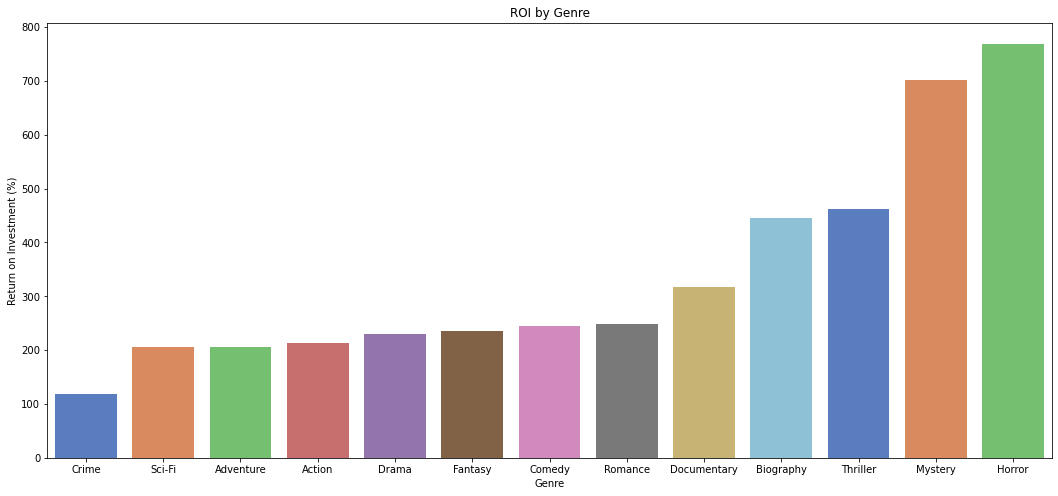

In [190]:
plt.figure(figsize=(18, 8))  # Set the figure size

bar_plot = sns.barplot(
    x='genres',  # Set genre_name on the y-axis
    y='ROI_%',      # Set ROI_% on the x-axis
    data=df_question1_results,
    palette='muted',  # Color palette
    ci=None           # Disable confidence interval
)

# Set title and labels for axes
plt.title('ROI by Genre')
plt.ylabel('Return on Investment (%)')
plt.xlabel('Genre')

# Show the plot
plt.show()

As we can see there is an evident high ROI with the Horror and Mystery because they have more than 700% in ROI.

### 3.5.8 Second Question: Study the relationship of run-time with ROI and Production Cost

**Let's look at IM dataset**

We look at the table movie_basics of the im dataset as it contains information about the run-times

In [191]:
conn = sqlite3.connect(route_db)
df_im_movie_basics = pd.read_sql_query("SELECT * FROM MOVIE_BASICS", conn)

df_im_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Let's start by droping columns that we're not going to need. 

In [192]:
drop_list = ['genres','start_year','original_title']
df_im_movie_basics_updated = df_im_movie_basics.drop(drop_list, axis=1)
df_im_movie_basics_updated

,movie_id,primary_title,runtime_minutes
0,tt0063540,Sunghursh,175.0
1,tt0066787,One Day Before the Rainy Season,114.0
2,tt0069049,The Other Side of the Wind,122.0
3,tt0069204,Sabse Bada Sukh,NaN
4,tt0100275,The Wandering Soap Opera,80.0
...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,123.0
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,NaN
146141,tt9916706,Dankyavar Danka,NaN
146142,tt9916730,6 Gunn,116.0


Let's drop duplicated movies

In [193]:
df_im_movie_basics_updated.drop_duplicates(['primary_title'], inplace=True)

Let's look at the NaN values of the column runtime_minutes

In [194]:
(df_im_movie_basics_updated['runtime_minutes'].isna().sum()/len(df_im_movie_basics_updated['runtime_minutes']))*100

21.660015727083653

We decide to drop the NaN rows

In [195]:
df_im_movie_basics_updated = df_im_movie_basics_updated[df_im_movie_basics_updated['runtime_minutes'].notna()]
df_im_movie_basics_updated

,movie_id,primary_title,runtime_minutes
0,tt0063540,Sunghursh,175.0
1,tt0066787,One Day Before the Rainy Season,114.0
2,tt0069049,The Other Side of the Wind,122.0
4,tt0100275,The Wandering Soap Opera,80.0
5,tt0111414,A Thin Life,75.0
...,...,...,...
146133,tt9916132,The Mystery of a Buryat Lama,94.0
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,84.0
146137,tt9916190,Safeguard,90.0
146139,tt9916538,Kuambil Lagi Hatiku,123.0


In [196]:
bins = [0,90,120,float('inf')]
df_im_movie_basics_updated['runtime_minutes'] = pd.cut(df_im_movie_basics_updated['runtime_minutes'],labels=['short','medium','long'],bins=bins,right=False)
df_im_movie_basics_updated

<ipython-input-196-d846936a5a81>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_im_movie_basics_updated['runtime_minutes'] = pd.cut(df_im_movie_basics_updated['runtime_minutes'],labels=['short','medium','long'],bins=bins,right=False)


,movie_id,primary_title,runtime_minutes
0,tt0063540,Sunghursh,long
1,tt0066787,One Day Before the Rainy Season,medium
2,tt0069049,The Other Side of the Wind,long
4,tt0100275,The Wandering Soap Opera,short
5,tt0111414,A Thin Life,short
...,...,...,...
146133,tt9916132,The Mystery of a Buryat Lama,medium
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,short
146137,tt9916190,Safeguard,medium
146139,tt9916538,Kuambil Lagi Hatiku,long


We are going to do the merge of df_im_movie_basics_updated with df_tn. 

In [197]:
df_tn

,primary_title,production_budget,worldwide_gross,ROI_%
0,Avatar,425000000.0,2.776345e+09,553.26
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,154.67
2,Dark Phoenix,350000000.0,1.497624e+08,-57.21
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,324.38
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,315.37
...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,-100.00
5778,Following,6000.0,2.404950e+05,3908.25
5779,Return to the Land of Wonders,5000.0,1.338000e+03,-73.24
5780,A Plague So Pleasant,1400.0,0.000000e+00,-100.00


In [198]:
df_question2 = df_im_movie_basics_updated.merge(df_tn, on='primary_title', how='inner')
df_question2

,movie_id,primary_title,runtime_minutes,production_budget,worldwide_gross,ROI_%
0,tt0249516,Foodfight!,medium,45000000.0,73706.0,-99.84
1,tt0326592,The Overnight,short,200000.0,1165996.0,483.00
2,tt0337692,On the Road,long,25000000.0,9313302.0,-62.75
3,tt0359950,The Secret Life of Walter Mitty,medium,91000000.0,187861183.0,106.44
4,tt0365907,A Walk Among the Tombstones,medium,28000000.0,62108587.0,121.82
...,...,...,...,...,...,...
2191,tt9275702,Salvador,short,4500000.0,1500000.0,-66.67
2192,tt9313936,Stay Alive,short,20000000.0,23187506.0,15.94
2193,tt9607270,The Blue Bird,short,1200000.0,887000.0,-26.08
2194,tt9805168,Traitor,medium,22000000.0,27882226.0,26.74


Let's do a count by groupby in runtime_minutes to see what the distribution is of each runtime_minutes group

In [199]:
df_question2.groupby('runtime_minutes').count()

,movie_id,primary_title,production_budget,worldwide_gross,ROI_%
runtime_minutes,,,,,
short,477,477,477,477,477
medium,1334,1334,1334,1334,1334
long,385,385,385,385,385


Now, we will calculate the mean of production_budget and ROI_% for each movie

In [200]:
df_question2_result = df_question2.groupby('runtime_minutes').agg({'production_budget':'mean', 'ROI_%':'mean'}).reset_index()
df_question2_result

,runtime_minutes,production_budget,ROI_%
0,short,2.078161e+07,510.192013
1,medium,3.272034e+07,217.293778
2,long,6.910003e+07,359.420987


We will now do a representation of each metric

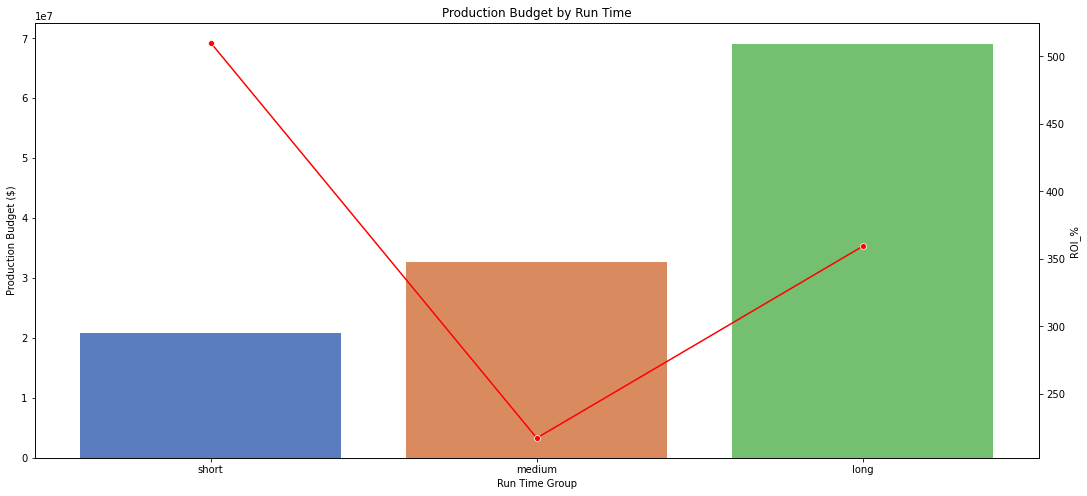

In [201]:
plt.figure(figsize=(18, 8))  # Set the figure size

bar_plot = sns.barplot(
    x='runtime_minutes', 
    y='production_budget',      
    data=df_question2_result,
    palette='muted',  # Color palette
    ci=None           # Disable confidence interval
)

# Set title and labels for axes
plt.title('Production Budget by Run Time')
plt.ylabel('Production Budget ($)')
plt.xlabel('Run Time Group')

ax2 = plt.twinx()

# Let's create a second plot with a line graph that shows the ROI_%
line_plot = sns.lineplot(
    x='runtime_minutes',
    y='ROI_%',
    data=df_question2_result,
    color='red',  # Line color
    marker='o',   # Marker style
    sort=False,   # Avoids sorting to keep the order of the x-axis
    ax=ax2        # Plot against the secondary y-axis
)


# Show the plot
plt.show()




With the graph above, we've reached the conclusion that the short films (ie those that have a run_time less than 90 minutes) are very interesting to invest on as they have the highest ROI_% and the shortest production budgets

### 3.5.9 Third Question: Study the relationship of director with ROI and Production Cost

To be able to answer the third question we're going to need the following tables of IM: movie_ratings, movie_basics, directors, and persons

In [202]:
query = """

SELECT p.person_id, p.primary_name, d.movie_id, mb.primary_title, mr.averagerating, mr.numvotes
FROM MOVIE_RATINGS AS mr
INNER JOIN MOVIE_BASICS AS mb
USING (movie_id)
INNER JOIN DIRECTORS AS d
USING (movie_id)
INNER JOIN PERSONS AS p
USING (person_id)


"""
conn = sqlite3.connect(route_db)
df_im = pd.read_sql_query(query, conn)

df_im


,person_id,primary_name,movie_id,primary_title,averagerating,numvotes
0,nm8353804,Sukh Sanghera,tt10356526,Laiye Je Yaarian,8.3,31
1,nm8353804,Sukh Sanghera,tt10356526,Laiye Je Yaarian,8.3,31
2,nm9250842,Caolan Robertson,tt10384606,Borderless,8.9,559
3,nm9932562,George Llewelyn-John,tt10384606,Borderless,8.9,559
4,nm1915232,Marcel Grant,tt1042974,Just Inès,6.4,20
...,...,...,...,...,...,...
181382,nm0849465,Gorô Taniguchi,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,7.5,24
181383,nm0849465,Gorô Taniguchi,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,7.5,24
181384,nm1272773,Prachya Pinkaew,tt9851050,Sisters,4.7,14
181385,nm0001206,Abel Ferrara,tt9886934,The Projectionist,7.0,5


Let's start by looking at potential duplicates

In [203]:
df_im.duplicated().sum()

95357

We proceed to drop them

In [204]:
df_im.drop_duplicates(inplace=True)
df_im

,person_id,primary_name,movie_id,primary_title,averagerating,numvotes
0,nm8353804,Sukh Sanghera,tt10356526,Laiye Je Yaarian,8.3,31
2,nm9250842,Caolan Robertson,tt10384606,Borderless,8.9,559
3,nm9932562,George Llewelyn-John,tt10384606,Borderless,8.9,559
4,nm1915232,Marcel Grant,tt1042974,Just Inès,6.4,20
5,nm0001317,Renny Harlin,tt1043726,The Legend of Hercules,4.2,50352
...,...,...,...,...,...,...
181381,nm3828616,Alexandru Mavrodineanu,tt9805820,Caisa,8.1,25
181382,nm0849465,Gorô Taniguchi,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,7.5,24
181384,nm1272773,Prachya Pinkaew,tt9851050,Sisters,4.7,14
181385,nm0001206,Abel Ferrara,tt9886934,The Projectionist,7.0,5


We would like to see the distribution of averagerating

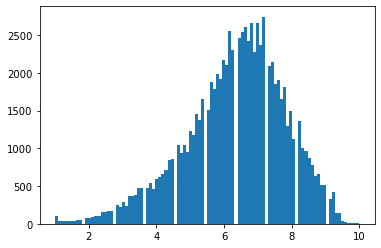

In [205]:
plt.hist(df_im['averagerating'], bins=100);

We will now look at the distribution of numvotes

In [206]:
df_im.describe()

,averagerating,numvotes
count,86030.000000,8.603000e+04
mean,6.340112,3.370315e+03
std,1.475066,2.945046e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.700000e+01
75%,7.400000,2.640000e+02
max,10.000000,1.841066e+06


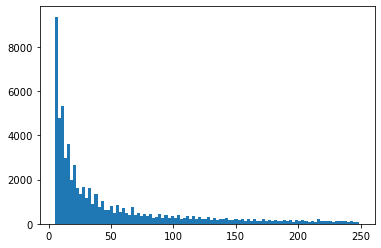

In [207]:
plt.hist(df_im[df_im['numvotes']<250]['numvotes'], bins=100);

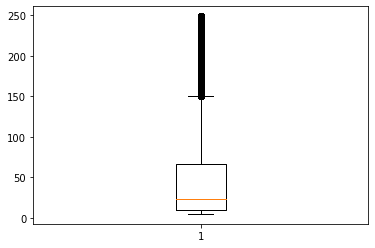

In [208]:
plt.boxplot(df_im[df_im['numvotes']<250]['numvotes']);

We will carry on by on by eliminating outliers. For that we've decided to disregard anything under the 10% percentile and over the 90% percentile

In [209]:
max_value = np.percentile(df_im['numvotes'], 90)
max_value

1494.0

In [210]:
min_value = np.percentile(df_im['numvotes'], 10)
min_value

7.0

In [211]:
df_im = df_im[df_im['numvotes'].between(min_value, max_value)]
df_im

,person_id,primary_name,movie_id,primary_title,averagerating,numvotes
0,nm8353804,Sukh Sanghera,tt10356526,Laiye Je Yaarian,8.3,31
2,nm9250842,Caolan Robertson,tt10384606,Borderless,8.9,559
3,nm9932562,George Llewelyn-John,tt10384606,Borderless,8.9,559
4,nm1915232,Marcel Grant,tt1042974,Just Inès,6.4,20
9,nm1926349,Carlos M. Barros,tt1060240,Até Onde?,6.5,21
...,...,...,...,...,...,...
181380,nm8393857,Alwa Ritsila,tt9783738,Bangkok Dark Tales,7.4,7
181381,nm3828616,Alexandru Mavrodineanu,tt9805820,Caisa,8.1,25
181382,nm0849465,Gorô Taniguchi,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,7.5,24
181384,nm1272773,Prachya Pinkaew,tt9851050,Sisters,4.7,14


Let's look again at the distribution of numvotes

In [212]:
df_im.describe()

,averagerating,numvotes
count,70988.000000,70988.000000
mean,6.295291,162.141630
std,1.497798,269.656327
min,1.000000,7.000000
25%,5.400000,16.000000
50%,6.500000,44.000000
75%,7.300000,170.000000
max,10.000000,1494.000000


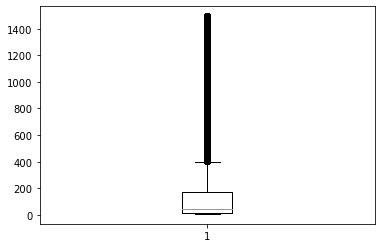

In [213]:
plt.boxplot(df_im['numvotes']);

As can be seen there is still a considerable number of outliers. However, we disregard eliminating again registrations as we would consider it necessary to have a large number of registrations 

Now let's check if there are NaN of the column averagerating and numvotes

In [214]:
df_im['averagerating'].isna().any()

False

In [215]:
df_im['numvotes'].isna().any()

False

We will now proceed to group by director and carry on the analysis

In [216]:
df_im

,person_id,primary_name,movie_id,primary_title,averagerating,numvotes
0,nm8353804,Sukh Sanghera,tt10356526,Laiye Je Yaarian,8.3,31
2,nm9250842,Caolan Robertson,tt10384606,Borderless,8.9,559
3,nm9932562,George Llewelyn-John,tt10384606,Borderless,8.9,559
4,nm1915232,Marcel Grant,tt1042974,Just Inès,6.4,20
9,nm1926349,Carlos M. Barros,tt1060240,Até Onde?,6.5,21
...,...,...,...,...,...,...
181380,nm8393857,Alwa Ritsila,tt9783738,Bangkok Dark Tales,7.4,7
181381,nm3828616,Alexandru Mavrodineanu,tt9805820,Caisa,8.1,25
181382,nm0849465,Gorô Taniguchi,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,7.5,24
181384,nm1272773,Prachya Pinkaew,tt9851050,Sisters,4.7,14


In [217]:
df_im.groupby('primary_name').count().sort_values('numvotes', ascending=False)

,person_id,movie_id,primary_title,averagerating,numvotes
primary_name,,,,,
Sergey A.,39,39,39,39,39
Nayato Fio Nuala,34,34,34,34,34
Larry Rosen,34,34,34,34,34
Dustin Ferguson,30,30,30,30,30
Paul T.T. Easter,28,28,28,28,28
...,...,...,...,...,...
Ivan Hurzeler,1,1,1,1,1
Ivan Kavanagh,1,1,1,1,1
Ivan Kitaev,1,1,1,1,1


In [218]:
counts = df_im.groupby('primary_name')['person_id'].count()

We will only consider directors who have done at least 4 movies

In [219]:
filtered_names = counts[counts>=4].index

In [220]:
df_im = df_im[df_im['primary_name'].isin(filtered_names)]
df_im

,person_id,primary_name,movie_id,primary_title,averagerating,numvotes
85,nm2310557,Andrey Iskanov,tt1323962,Andrey Iskanov's Ingression,5.1,101
143,nm0135724,Antonio Capuano,tt1438493,Dark Love,6.3,86
144,nm1564826,David Verbeek,tt1443518,R U There,5.5,297
148,nm1494245,Omar Shargawi,tt1450750,My Father from Haifa,8.6,27
190,nm0084819,Claus Bjerre,tt1512893,Father of Four - In Japanese Mode,3.4,212
...,...,...,...,...,...,...
181351,nm3406099,Donatas Ulvydas,tt9575726,Ir visi ju vyrai,7.7,161
181353,nm2418217,Gilles Perret,tt9576110,J'veux du soleil,6.8,65
181359,nm2209378,Lu Zhang,tt9619016,Fukuoka,7.0,27
181371,nm4070848,Meng Zhang,tt9690762,On the Balcony,5.6,37


Now we're going to look at the averagerating of each director

In [221]:
df_averagerating_director = df_im.groupby('primary_name').agg({'averagerating':'mean'}).sort_values('averagerating', ascending=False)
df_averagerating_director

,averagerating
primary_name,
Nuo Wang,9.100000
Yasmine Asha,8.940000
Steve Ravic,8.883333
Zheng Zhou,8.825000
Ian Cranston,8.800000
...,...
Eldar Bogunov,1.342857
Chihiro Ikeda,1.285714
Keiko Tsuruoka,1.216667


Now we have to merge df_im with df_tn so as to be able to see per director their average rating, their average production_budget, ROI_%

In [222]:
df_tn

,primary_title,production_budget,worldwide_gross,ROI_%
0,Avatar,425000000.0,2.776345e+09,553.26
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,154.67
2,Dark Phoenix,350000000.0,1.497624e+08,-57.21
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,324.38
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,315.37
...,...,...,...,...
5777,Red 11,7000.0,0.000000e+00,-100.00
5778,Following,6000.0,2.404950e+05,3908.25
5779,Return to the Land of Wonders,5000.0,1.338000e+03,-73.24
5780,A Plague So Pleasant,1400.0,0.000000e+00,-100.00


In [223]:
df_question3 = df_im.merge(df_tn, on='primary_title', how='inner')
df_question3

,person_id,primary_name,movie_id,primary_title,averagerating,numvotes,production_budget,worldwide_gross,ROI_%
0,nm3620652,Aly Muritiba,tt7467324,Rust,6.6,377,250000.0,0.0,-100.00
1,nm0000929,Corbin Bernsen,tt1360826,Rust,5.6,404,250000.0,0.0,-100.00
2,nm0300880,Daniele Gaglianone,tt1833781,Rust,6.1,412,250000.0,0.0,-100.00
3,nm5619726,Joe Lujan,tt3490320,Rust,6.1,22,250000.0,0.0,-100.00
4,nm4110102,Raja Chanda,tt10300662,Kidnap,7.5,26,21000000.0,34836080.0,65.89
...,...,...,...,...,...,...,...,...,...
199,nm0139337,Fred Carpenter,tt1653203,Jesse,4.9,96,950000.0,0.0,-100.00
200,nm3147876,Sang-woo Lee,tt4036590,Speed,5.9,9,30000000.0,283200000.0,844.00
201,nm1757671,Robert Conway,tt5607782,The Covenant,5.2,1359,20000000.0,38164784.0,90.82
202,nm0104487,Larry Brand,tt2387589,The Girl on the Train,4.4,819,45000000.0,174278214.0,287.28


Let's check for NaN values

In [224]:
df_question3.isnull().any()

person_id            False
primary_name         False
movie_id             False
primary_title        False
averagerating        False
numvotes             False
production_budget    False
worldwide_gross      False
ROI_%                False
dtype: bool

Now let's group by director and see their averagerating, average production_budget and average ROI_%

In [225]:
df_question3_result = df_question3.groupby('primary_name').agg({'averagerating':'mean','production_budget':'mean','ROI_%':'mean'}).sort_values('averagerating', ascending=False)
df_question3_result

,averagerating,production_budget,ROI_%
primary_name,,,
Daniel Beard,8.8,90000000.0,-88.28
Tim Van Someren,8.7,10000000.0,-78.20
Aashiq Abu,8.6,75000000.0,-59.16
Brett Sullivan,8.5,5000000.0,2085.07
Larry Rosen,8.3,23000000.0,-18.90
...,...,...,...
Mark Steven Grove,2.8,20000000.0,79.21
Rob Hawk,2.7,20000000.0,-100.00
Steven M. Smith,2.6,1000000.0,1698.50


Let's filter out the directors that have a negative ROI_%

In [226]:
df_question3_result = df_question3_result[df_question3_result['ROI_%']>0]
df_question3_result

,averagerating,production_budget,ROI_%
primary_name,,,
Brett Sullivan,8.5,5000000.0,2085.070
Jeremy Herrin,8.1,14000000.0,41.630
Robert Delamere,8.1,32100000.0,230.540
Hanung Bramantyo,8.0,7500000.0,712.625
Nawapol Thamrongrattanarit,8.0,37500000.0,35.060
...,...,...,...
Daniel Armstrong,3.5,400000.0,190.500
Vince D'Amato,3.4,20000000.0,1126.520
Maurice Smith,3.0,35000000.0,147.570


<ipython-input-227-326b5474f18b>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_question3_result.index, rotation=90)


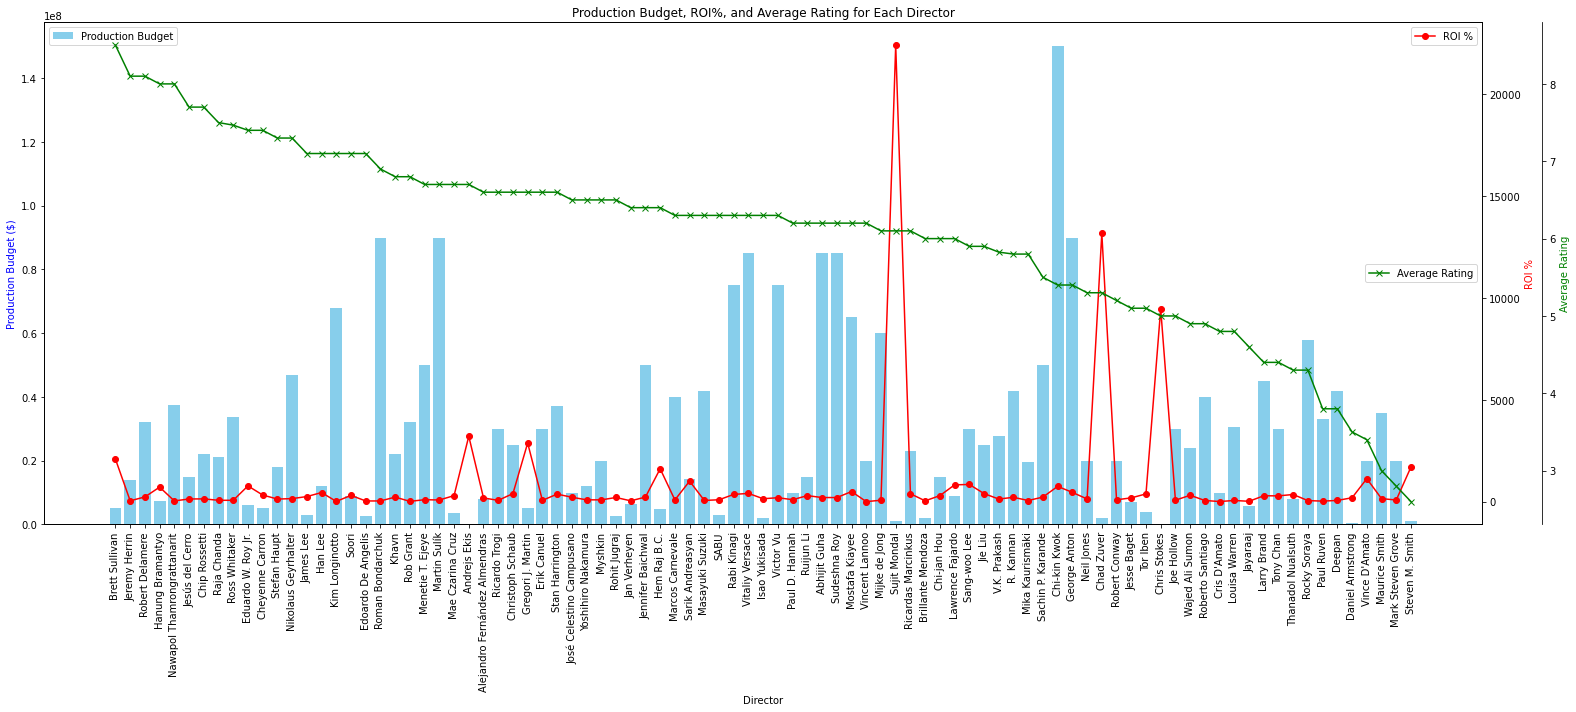

In [227]:
fig, ax1 = plt.subplots(figsize=(22, 10))

# Plot the 'production_budget' as a bar plot
ax1.bar(df_question3_result.index, df_question3_result['production_budget'], label='Production Budget', color='skyblue')

# Create the secondary axis for the 'ROI_%'
ax2 = ax1.twinx()

# Plot the 'ROI_%' as a line plot
ax2.plot(df_question3_result.index, df_question3_result['ROI_%'], label='ROI %', color='red', marker='o')

# Plot the 'averagerating' as another line plot
ax3 = ax1.twinx()
# Offset the second y-axis to the right
ax3.spines['right'].set_position(('outward', 60))  
ax3.plot(df_question3_result.index, df_question3_result['averagerating'], label='Average Rating', color='green', marker='x')

# Set the labels and titles
ax1.set_xlabel('Director')
ax1.set_ylabel('Production Budget ($)', color='blue')
ax2.set_ylabel('ROI %', color='red')
ax3.set_ylabel('Average Rating', color='green')

# Set the x-axis category labels (if necessary)
ax1.set_xticklabels(df_question3_result.index, rotation=90)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# Show the plot
plt.title('Production Budget, ROI%, and Average Rating for Each Director')
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()

The directors that directly come into mind are the following in the following order: 
1. Sujit Mondal
2. Chad Zuver
3. Chris Stokes
4. Andrejs Ekis
5. Gregori J.Martin

Let's take a closer look at their data and see the number of movies each director did:

In [228]:
df_directors = df_im.groupby('primary_name').count().sort_values('numvotes', ascending=False)
df_directors.reset_index(inplace=True)

df_directors[df_directors['primary_name'].isin(['Sujit Mondal','Chad Zuver','Chris Stokes','Andrejs Ekis','Gregori J. Martin'])]

,primary_name,person_id,movie_id,primary_title,averagerating,numvotes
98,Chris Stokes,11,11,11,11,11
321,Sujit Mondal,7,7,7,7,7
618,Andrejs Ekis,6,6,6,6,6
1027,Gregori J. Martin,5,5,5,5,5
1900,Chad Zuver,4,4,4,4,4


Looking at the results, we would recommend having Sujit Mondal, and Chris Stokes as one of the directors. They have done already 7 films, and 11 films respectively. Their ROIs are about 25000%, and almost 15000% respectively. For both of them, their production budgets of their movies are almost negligeable. 

## 3.6 Results

As a whole these are the 3 Business recommendations:

    First business recommendation: Invest in horror movies. 
    
    Second business recommendation: Prioritize investment in short films (that have a running time of less than 90 minutes).

    Third business recommendation: Focus investments on movies that have been directed by: Sujit Mondal and Chris Stokes

Here is an in-depth description of the recommendations:


**First business recommendation:** 
Invest in movies that are of the genre horror. Data shows that they have more than a 750% on ROI. As can be seen in the following graph:

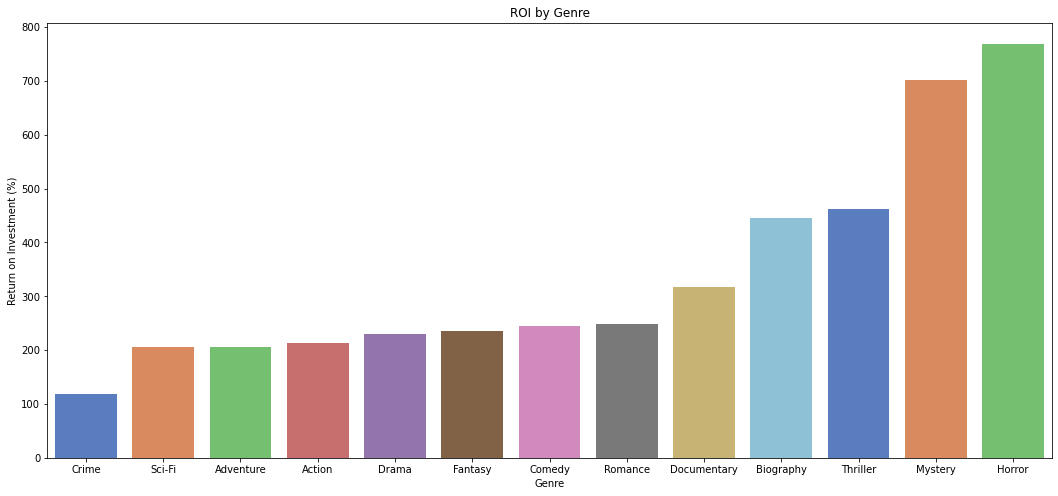

In [229]:
plt.figure(figsize=(18, 8))  # Set the figure size

bar_plot = sns.barplot(
    x='genres',  # Set genre_name on the y-axis
    y='ROI_%',      # Set ROI_% on the x-axis
    data=df_question1_results,
    palette='muted',  # Color palette
    ci=None           # Disable confidence interval
)

# Set title and labels for axes
plt.title('ROI by Genre')
plt.ylabel('Return on Investment (%)')
plt.xlabel('Genre')

# Show the plot
plt.show()

**Second business recommendation:** 
Invest in movies that are short films (ie those that have a run_time less than 90 minutes) as they have the highest ROI_% and the shortest production budgets.

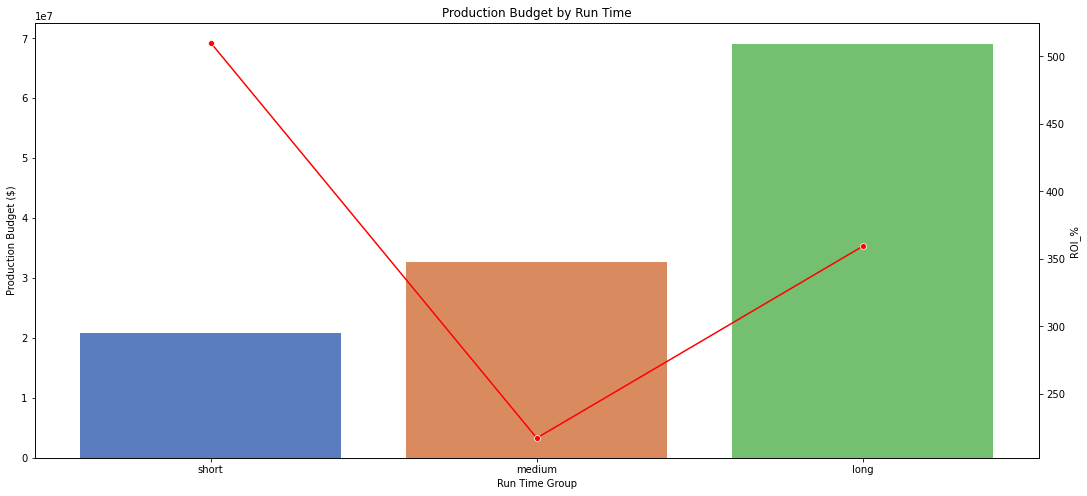

In [230]:
plt.figure(figsize=(18, 8))  # Set the figure size

bar_plot = sns.barplot(
    x='runtime_minutes', 
    y='production_budget',      
    data=df_question2_result,
    palette='muted',  # Color palette
    ci=None           # Disable confidence interval
)

# Set title and labels for axes
plt.title('Production Budget by Run Time')
plt.ylabel('Production Budget ($)')
plt.xlabel('Run Time Group')

ax2 = plt.twinx()

# Let's create a second plot with a line graph that shows the ROI_%
line_plot = sns.lineplot(
    x='runtime_minutes',
    y='ROI_%',
    data=df_question2_result,
    color='red',  # Line color
    marker='o',   # Marker style
    sort=False,   # Avoids sorting to keep the order of the x-axis
    ax=ax2        # Plot against the secondary y-axis
)


# Show the plot
plt.show()

**Third business recommendation:** 
We would recommend to hire Sujit Mondal, and Chris Stokes as one of the directors. They have done already 7 films, and 11 films respectively. Their ROIs are about 25000%, and almost 15000% respectively. For both of them, their production budgets of their movies are almost negligeable. 

<ipython-input-231-ef09f7109bc7>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_question3_result.index, rotation=90)


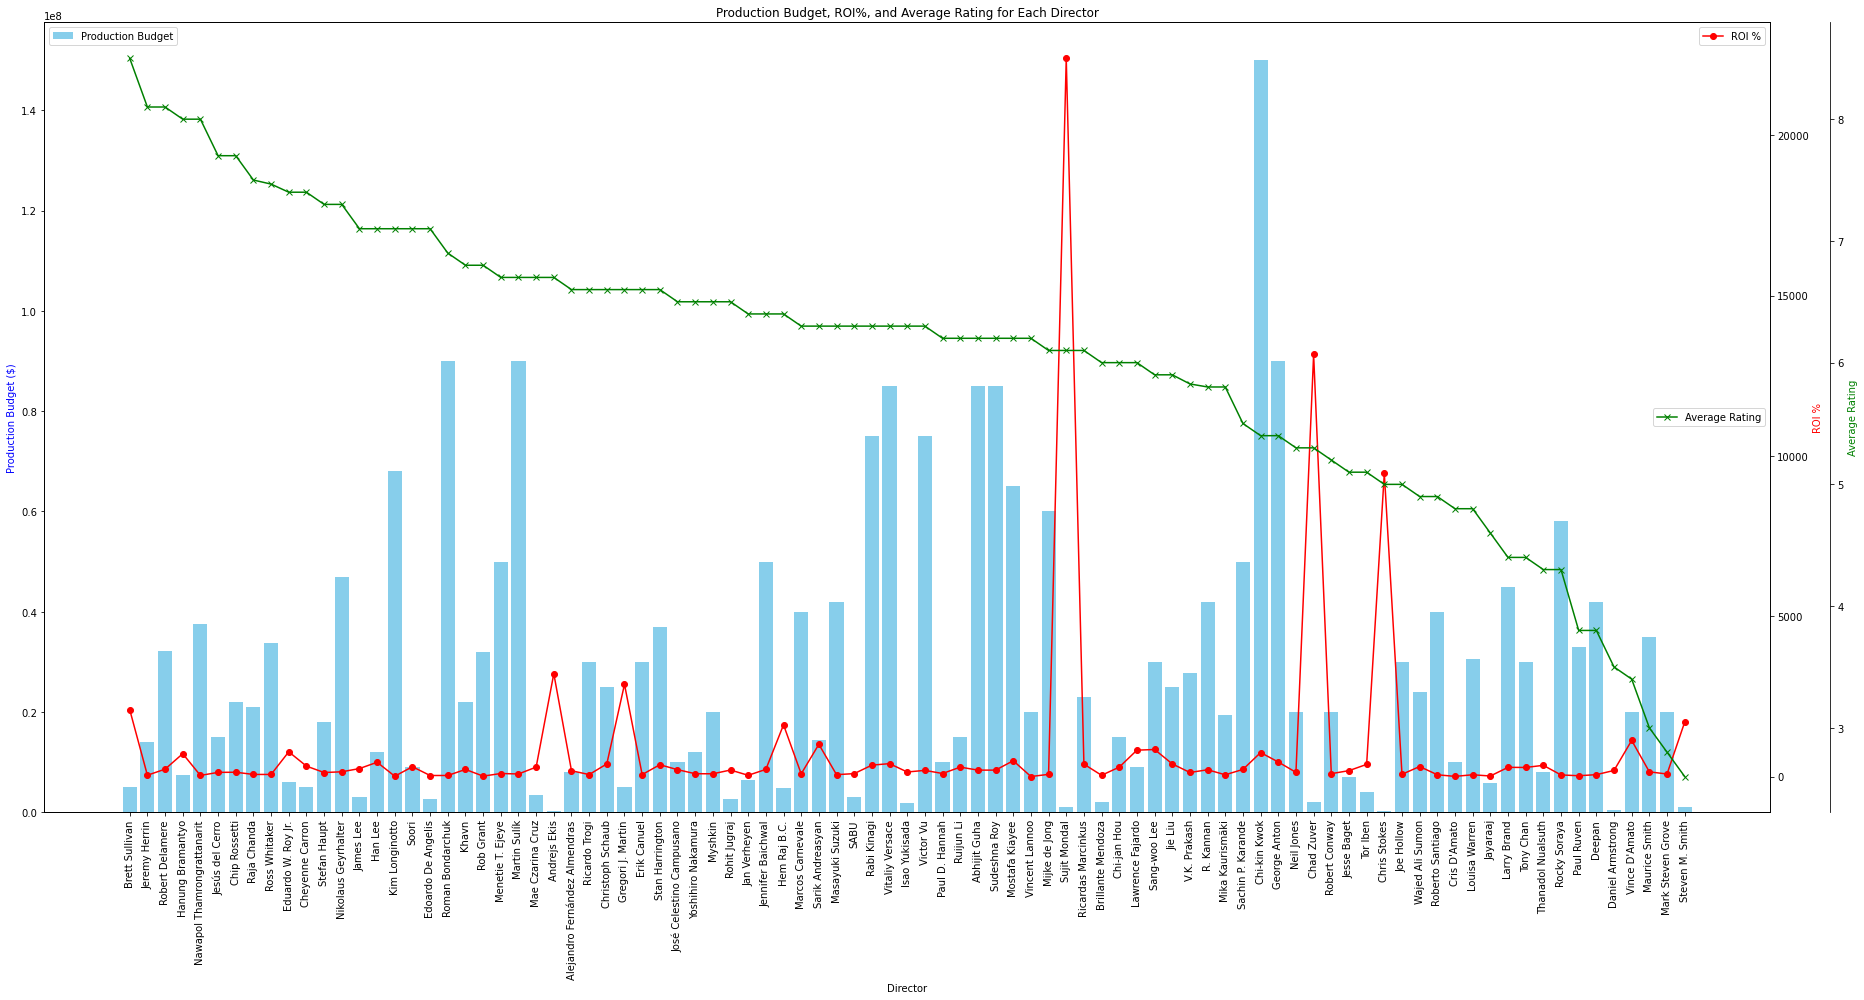

In [231]:
fig, ax1 = plt.subplots(figsize=(26, 14))

# Plot the 'production_budget' as a bar plot
ax1.bar(df_question3_result.index, df_question3_result['production_budget'], label='Production Budget', color='skyblue')

# Create the secondary axis for the 'ROI_%'
ax2 = ax1.twinx()

# Plot the 'ROI_%' as a line plot
ax2.plot(df_question3_result.index, df_question3_result['ROI_%'], label='ROI %', color='red', marker='o')

# Plot the 'averagerating' as another line plot
ax3 = ax1.twinx()
# Offset the second y-axis to the right
ax3.spines['right'].set_position(('outward', 60))  
ax3.plot(df_question3_result.index, df_question3_result['averagerating'], label='Average Rating', color='green', marker='x')

# Set the labels and titles
ax1.set_xlabel('Director')
ax1.set_ylabel('Production Budget ($)', color='blue')
ax2.set_ylabel('ROI %', color='red')
ax3.set_ylabel('Average Rating', color='green')

# Set the x-axis category labels (if necessary)
ax1.set_xticklabels(df_question3_result.index, rotation=90)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# Show the plot
plt.title('Production Budget, ROI%, and Average Rating for Each Director')
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels
plt.show()